# Sprint 03. Tasca 01
## By José Manuel Castaño

## - Exercici 1

Resumeix gràficament el data set DelayedFlights.csv

Crea almenys una visualització per:

    Una variable categòrica (UniqueCarrier)
    Una variable numèrica (ArrDelay)
    Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
    Dues variables numèriques (ArrDelay i DepDelay)
    Tres variables (ArrDelay, DepDelay i UniqueCarrier)
    Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

airlines = pd.read_csv('../Sprint_02/DelayedFlights.csv', index_col =0)
pd.set_option('display.max_columns', None)
airlines.head(10)

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\arraysetops.py:583: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,128.0,150.0,116.0,-14.0,8.0,IAD,TPA,810,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,128.0,145.0,113.0,2.0,19.0,IAD,TPA,810,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,N428WN,96.0,90.0,76.0,14.0,8.0,IND,BWI,515,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,90.0,90.0,77.0,34.0,34.0,IND,BWI,515,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,101.0,115.0,87.0,11.0,25.0,IND,JAX,688,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,N763SW,240.0,250.0,230.0,57.0,67.0,IND,LAS,1591,3.0,7.0,0,N,0,10.0,0.0,0.0,0.0,47.0
10,2008,1,3,4,706.0,700,916.0,915,WN,100,N690SW,130.0,135.0,106.0,1.0,6.0,IND,MCO,828,5.0,19.0,0,N,0,NaN,NaN,NaN,NaN,NaN
11,2008,1,3,4,1644.0,1510,1845.0,1725,WN,1333,N334SW,121.0,135.0,107.0,80.0,94.0,IND,MCO,828,6.0,8.0,0,N,0,8.0,0.0,0.0,0.0,72.0
15,2008,1,3,4,1029.0,1020,1021.0,1010,WN,2272,N263WN,52.0,50.0,37.0,11.0,9.0,IND,MDW,162,6.0,9.0,0,N,0,NaN,NaN,NaN,NaN,NaN
16,2008,1,3,4,1452.0,1425,1640.0,1625,WN,675,N286WN,228.0,240.0,213.0,15.0,27.0,IND,PHX,1489,7.0,8.0,0,N,0,3.0,0.0,0.0,0.0,12.0


In [4]:
#Treballem amb la vista flights que no te vols cancel.lats ni desviats. Així evitem nulls en algunes variables a estudiar
flights = airlines[(airlines['Cancelled']==0) & (airlines['Diverted']==0)]

In [5]:
#Previament mirem dades estadístiques de algunes variables numèriques
flights[['ActualElapsedTime', 'ArrDelay', 'DepDelay', 'Distance']].describe().round(3)
#Veiem que en totes les variables els valors màxims estan molt lluny de la mitja

,ActualElapsedTime,ArrDelay,DepDelay,Distance
count,1928371.000,1928371.000,1928371.000,1928371.000
mean,133.306,42.200,43.092,764.949
std,72.060,56.785,53.266,573.886
min,14.000,-109.000,6.000,11.000
25%,80.000,9.000,12.000,338.000
50%,116.000,24.000,24.000,606.000
75%,165.000,56.000,53.000,997.000
max,1114.000,2461.000,2467.000,4962.000


In [20]:
flights[['ActualElapsedTime','ArrDelay', 'DepDelay']].median()
#Veiem que en el cas de ArrDelay i DepDelay la mediana es casi la meitat que la mitja. (Cues llargues)

ActualElapsedTime    116.0
ArrDelay              24.0
DepDelay              24.0
dtype: float64

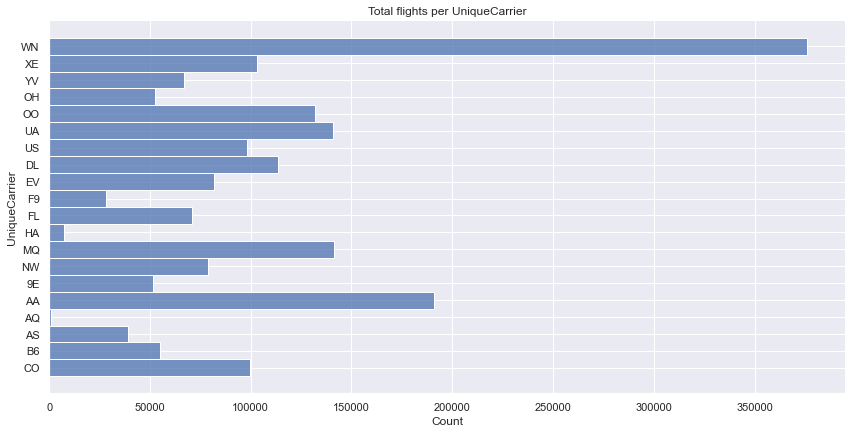

In [15]:
#Una variable categòrica (UniqueCarrier)
sns.displot(y="UniqueCarrier", data=flights,height=6, aspect=2 ).set(title='Total flights per UniqueCarrier');
plt.savefig('flights_per_Carrier.png')       #Generem arxiu amb la imatge
#Mostra el total de vols per companyia.

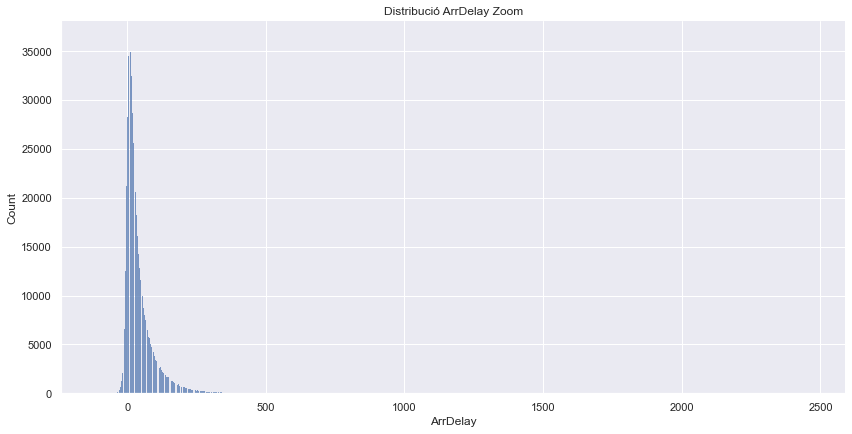

In [18]:
#Una variable numèrica (ArrDelay)
sns.displot(x="ArrDelay", data=flights, height=6, aspect=2).set(title='Distribució ArrDelay Zoom');
plt.savefig('distrib_ArrDelay.png')
#Veiem la seva distribució. Te una llarguísima cua

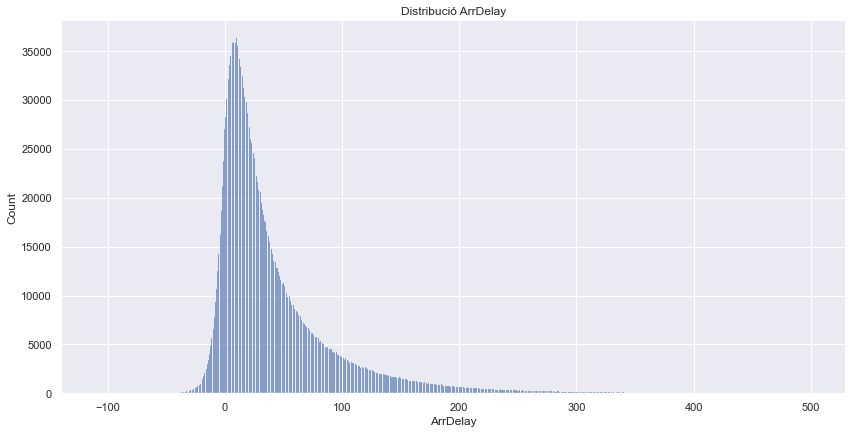

In [19]:
#Com que la majoria de vols tenen un ArrDelay inferior a 500, fem un zoom d'aquesta area per tal d'estudiar-la
sns.displot(x="ArrDelay", data=flights[flights['ArrDelay']<500], height=6, aspect=2).set(title='Distribució ArrDelay');
plt.savefig('Distrib_ArrDelay_Z.png')
#Observem que la majoria de vols porten un retrás, concentratat aprox entre 0 i 50'

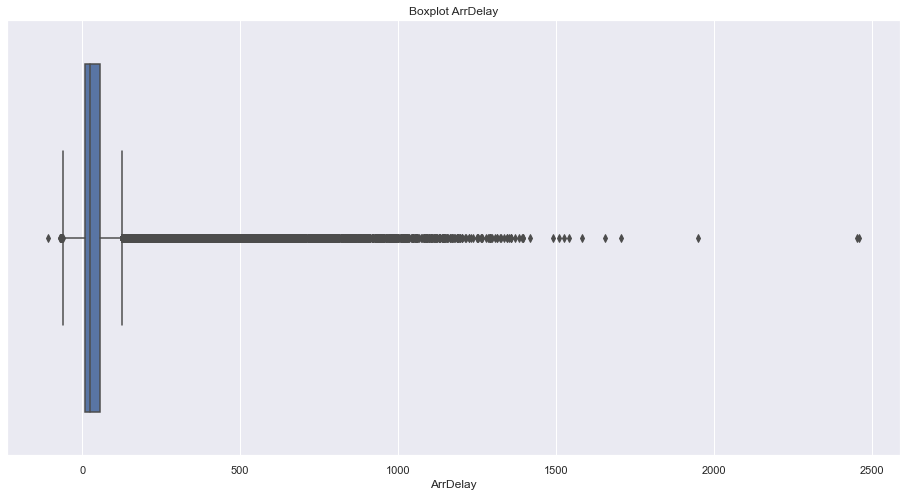

In [20]:
sns. set (rc = {"figure.figsize" :( 16, 8 )})
sns.boxplot(x='ArrDelay', data=flights).set(title='Boxplot ArrDelay');
plt.savefig('Boxplot_ArrDelay.png')
#Veiem que el 75% dels vols tenen un ArrDelay inferior a 50' aprox i que tenim una llarga cua

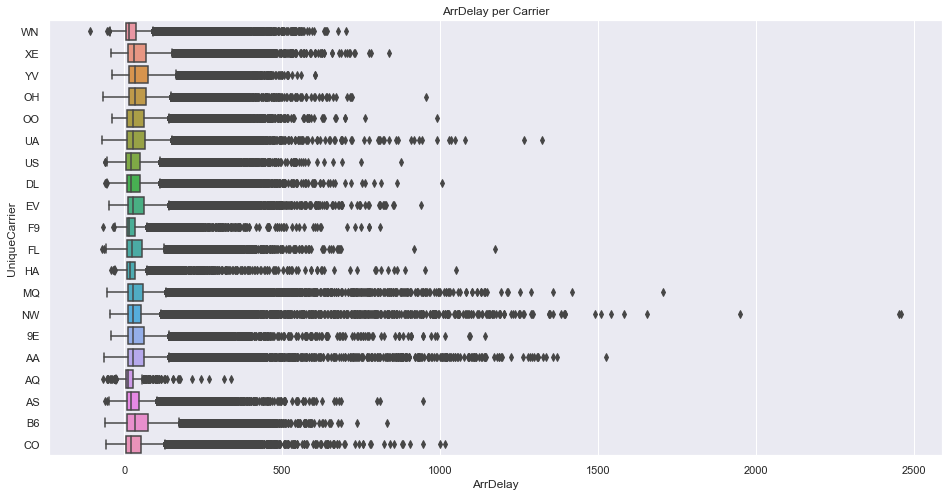

In [21]:
#Una variable numèrica i una categòrica (ArrDelay i UniqueCarrier)
sns. set (rc = {"figure.figsize" :( 16, 8 )})
sns.boxplot(y="UniqueCarrier", x="ArrDelay", data=flights).set(title='ArrDelay per Carrier');
plt.savefig('ArrDelay_carrier.png')
#Veiem que les companyies amb cues més llargues coincideixen amb les que tenen més vols (WN, AA...)

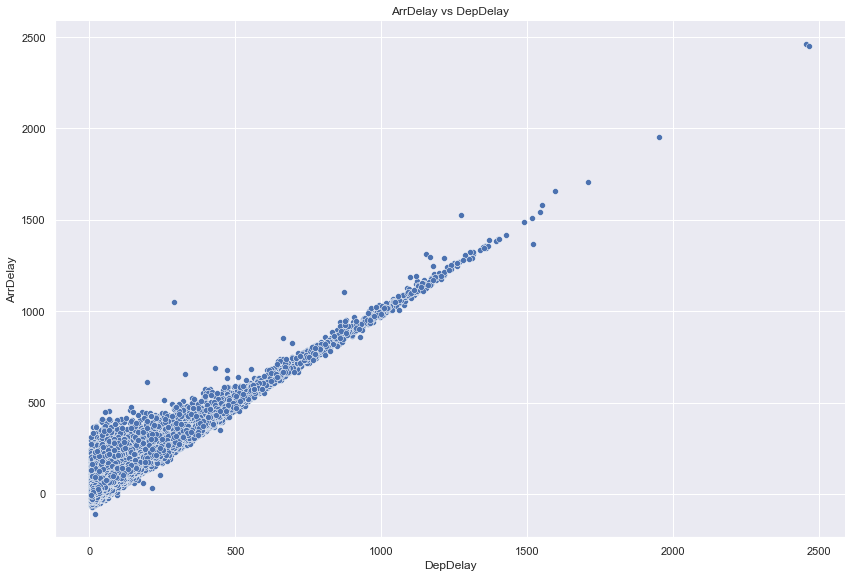

In [23]:
#Dues variables numèriques (ArrDelay i DepDelay)
sns.relplot(x="DepDelay", y="ArrDelay", data=flights,height=8, aspect=1.5).set(title='ArrDelay vs DepDelay');
plt.savefig('ArrDelay_DepDelay.png')

Observem que DepDelay elevats impliquen ArrDelay equivalents. Per DepDelay més petits, els ArrDelays poden superar ampliament el DepDelay. 

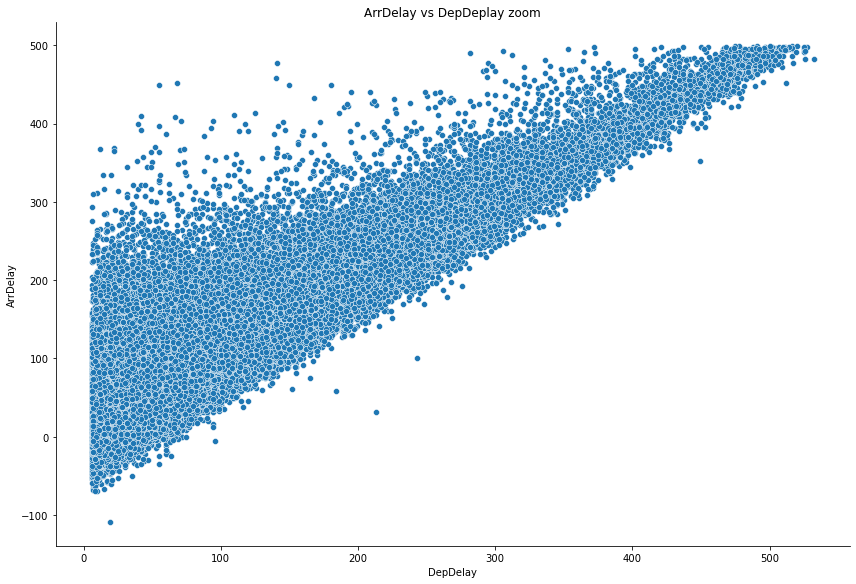

In [6]:
#Fem un zoom de la zona baixa de DepDelay
sns.relplot(x="DepDelay", y="ArrDelay", data=flights[flights['ArrDelay']<500], height=8, aspect=1.5 ).set(title='ArrDelay vs DepDeplay zoom');
plt.savefig('ArrDelay_DepDelay_Z.png')
#S'observa com petits delays de sortida poden provocar grans delays a la arribada 

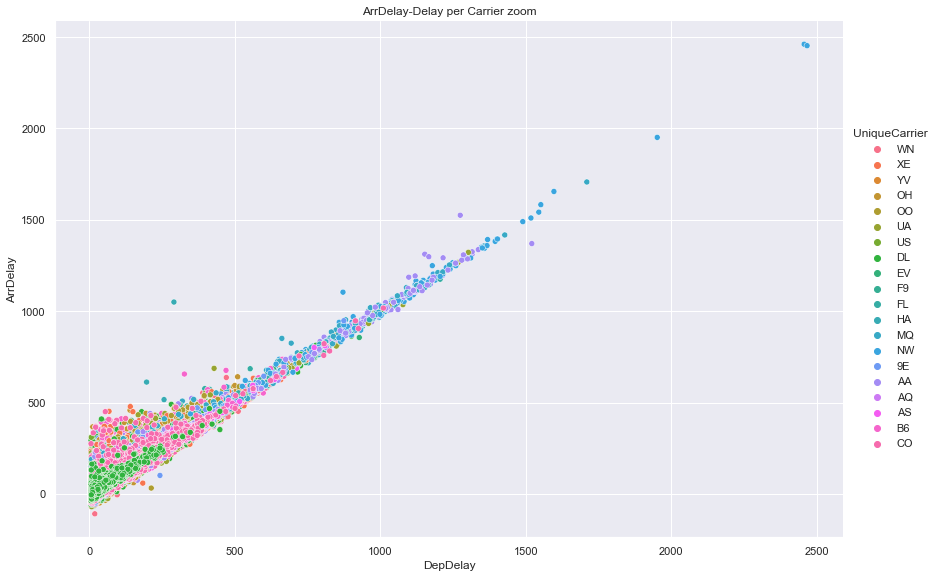

In [26]:
#Tres variables (ArrDelay, DepDelay i UniqueCarrier)
sns.relplot(x="DepDelay", y="ArrDelay", hue="UniqueCarrier", data=flights,height=8, aspect=1.5).set(title='ArrDelay-Delay per Carrier zoom');
plt.savefig('Arr_DepDelay_carrier.png')

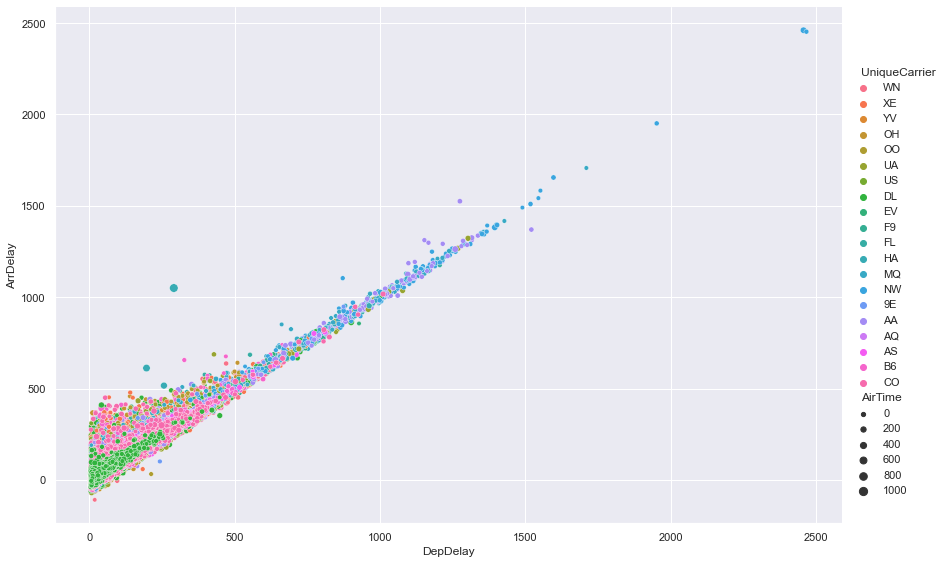

In [29]:
#Més de tres variables (ArrDelay, DepDelay, AirTime i UniqueCarrier).
sns.relplot(x='DepDelay', y='ArrDelay', hue='UniqueCarrier', size='AirTime', data=flights,height=8, aspect=1.5);
plt.savefig('Arr_Dep_air_carrier.png')

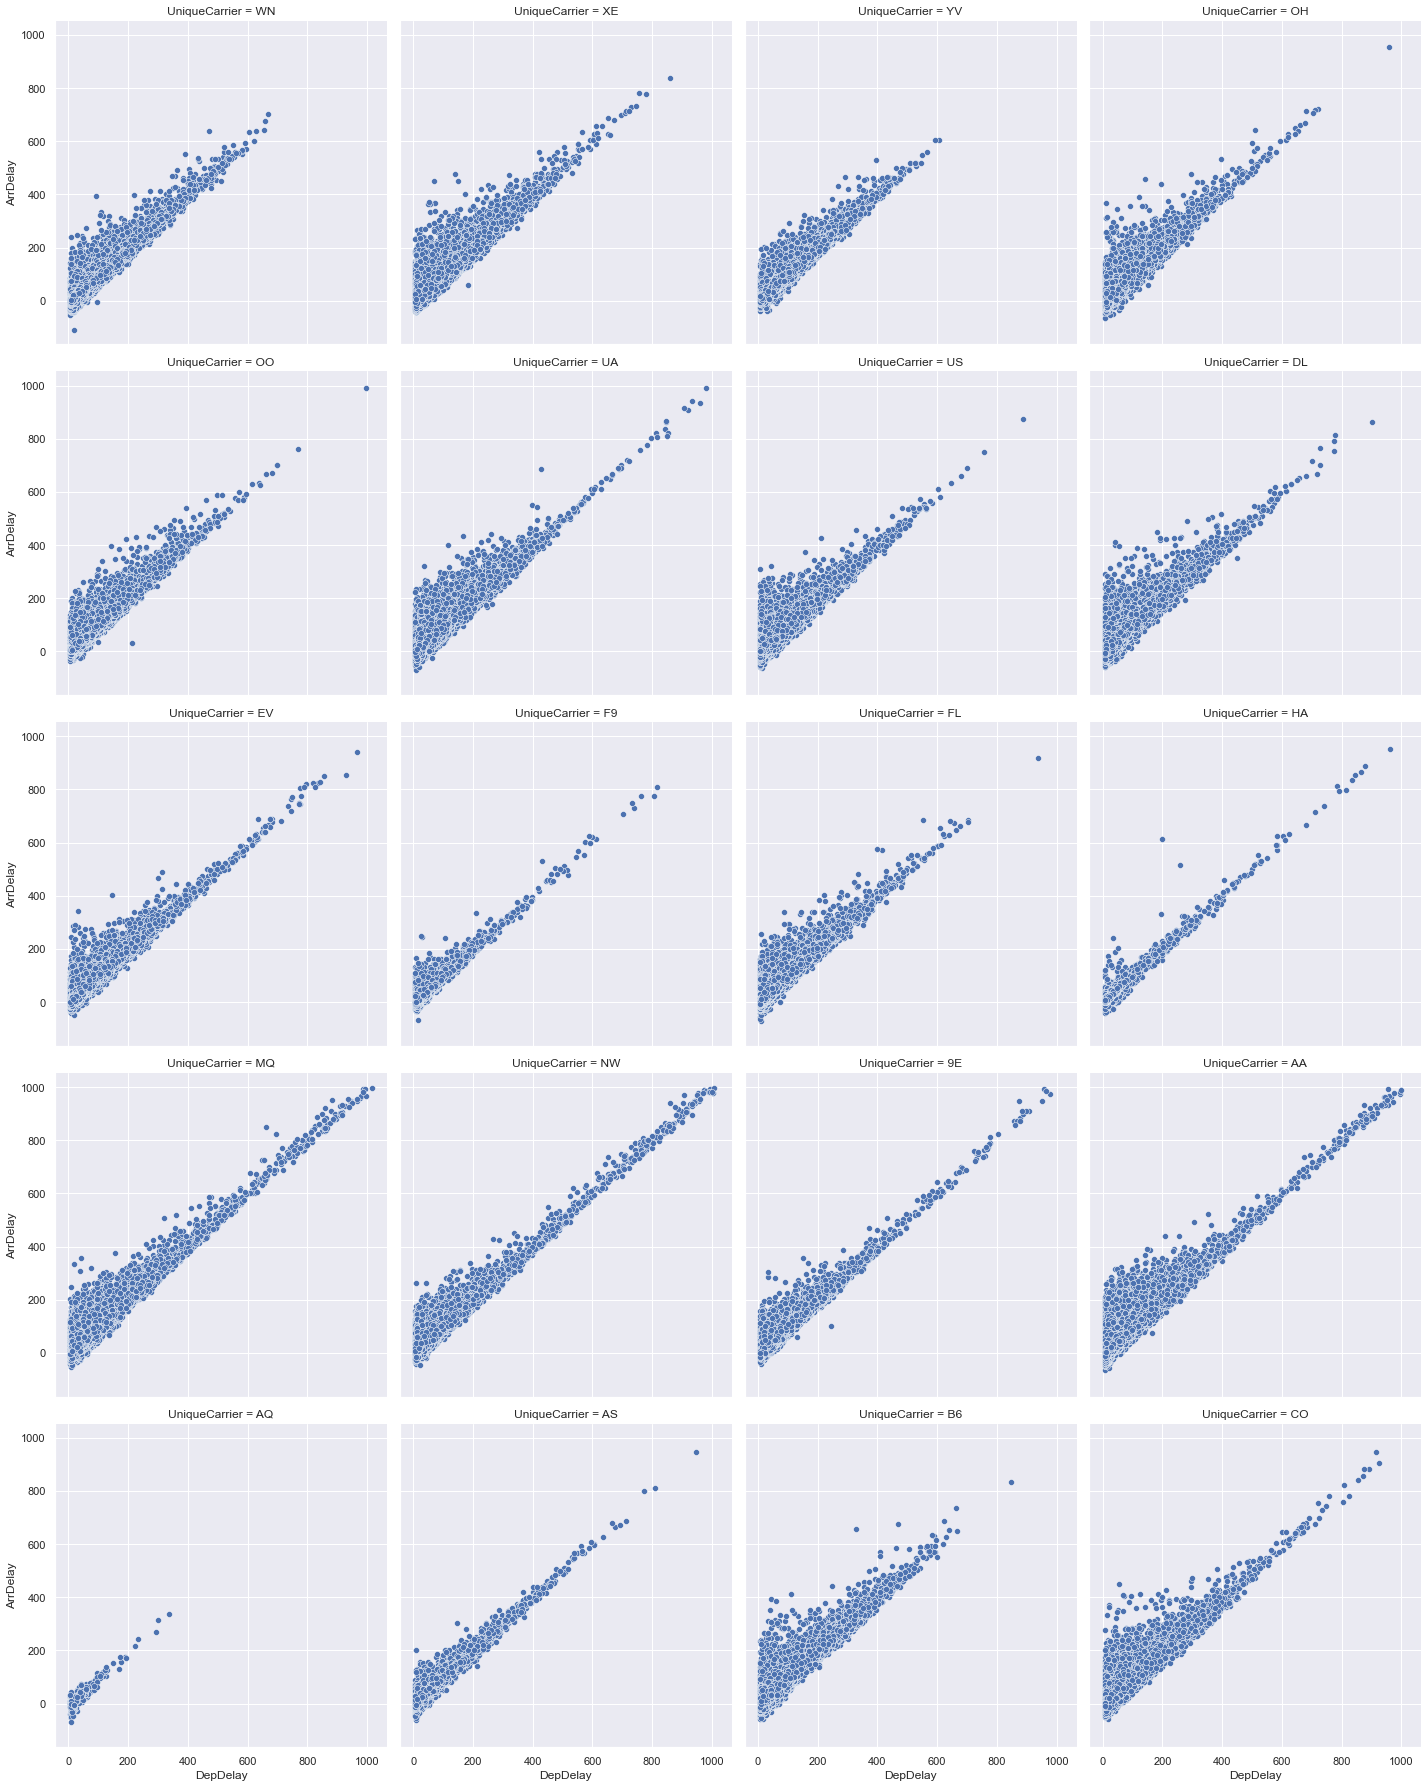

In [28]:
#Donat la acumulació de punts és un gràfic difícil de entendre. Segmentem per companyies en diferents gràfics i fem un zoom en la zona més poblada
sns.relplot(x="DepDelay", y="ArrDelay", col="UniqueCarrier", col_wrap=4, data=flights[flights['ArrDelay']<1000]);
plt.savefig('Arr_DepDelay_carrierZ.png')

Amb aquests gràfics es pot observar millor el comportament de les diverses companyies.
Algunes como HA i 9A s'observa que ArrDelay coincideix bastant amb DepDelay. En d'altres com AA i CO, ArrDelay supera ampliament el DepDelay

## - Exercici 2

Exporta els gràfics com imatges o com html.

In [1]:
#He exportat cada gràfic desprès de executar-lo amb la sentencia plt.savefig('filename.png')
#Adjunto els gràfics exportats